<a href="https://colab.research.google.com/github/JuanJoseMoraCarrascal/algoritmos/blob/main/MAZE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

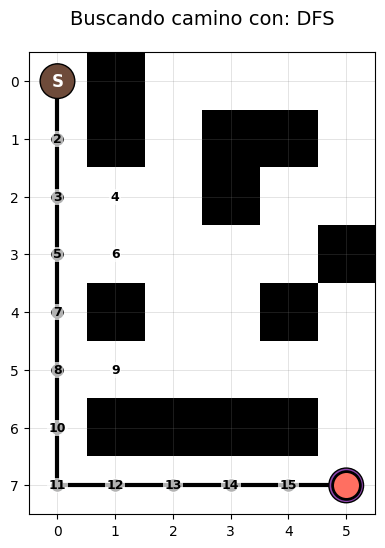

Camino encontrado con DFS
Camino encontrado: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5)]


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
import time
from typing import List, Tuple, Dict, Optional

class BuscadorDeRutaEnLaberinto:
    def __init__(self, laberinto: List[List[int]], inicio: Tuple[int, int], objetivo: Tuple[int, int]):
        self.laberinto = np.array(laberinto)
        self.inicio = inicio
        self.objetivo = objetivo
        self.filas, self.columnas = len(laberinto), len(laberinto[0])
        self.colores_algoritmos = {

        }

    def es_posicion_valida(self, x: int, y: int) -> bool:
        return (0 <= x < self.filas and
                0 <= y < self.columnas and
                self.laberinto[x][y] == 0)

    def obtener_vecinos(self, x: int, y: int) -> List[Tuple[int, int]]:
        vecinos = []
        for dx, dy in [(-1, 0), (0, 1), (1, 0), (0, -1)]:
            nuevo_x, nuevo_y = x + dx, y + dy
            if self.es_posicion_valida(nuevo_x, nuevo_y):
                vecinos.append((nuevo_x, nuevo_y))
        return vecinos

    def reconstruir_camino(self, actual: Tuple[int, int], padres: Dict) -> List[Tuple[int, int]]:
        camino = []
        while actual is not None:
            camino.append(actual)
            actual = padres[actual]
        return camino[::-1]

    def visualizar_paso(self, camino: List[Tuple[int, int]],
                        visitados: Dict[Tuple[int, int], int],
                        explorados: List[Tuple[int, int]],
                        actual: Optional[Tuple[int, int]],
                        algoritmo: str):
        clear_output(wait=True)

        plt.figure(figsize=(8, 6))
        plt.subplot(111, aspect='equal')
        plt.imshow(self.laberinto, cmap='binary', extent=[-0.5, self.columnas-0.5, self.filas-0.5, -0.5])
        plt.title(f"Buscando camino con: {algoritmo}", pad=20, size=14)

        plt.xticks(range(self.columnas))
        plt.yticks(range(self.filas))
        plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)

        if explorados:
            explorados_x, explorados_y = zip(*explorados)
            plt.scatter(np.array(explorados_y), np.array(explorados_x),
                        color='#A9CCE3', s=40, marker='x', label='Posiciones exploradas')

        if camino:
            camino_x, camino_y = zip(*camino)
            plt.plot(np.array(camino_y), np.array(camino_x),
                    color=self.colores_algoritmos.get(algoritmo, 'black'),
                    linewidth=3, marker='o', markersize=8)

        for pos, num in visitados.items():
            plt.text(pos[1], pos[0], str(num),
                    color='black', fontsize=9, fontweight='bold',
                    ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

        if actual:
            plt.plot(actual[1], actual[0], 'o',
                    color='#FF6F61', markersize=20,
                    label='Posición actual', markeredgecolor='black',
                    markeredgewidth=2, zorder=5)

        plt.text(self.inicio[1], self.inicio[0], 'S',
                color='white', fontsize=12, fontweight='bold',
                ha='center', va='center',
                bbox=dict(facecolor='#6E4B3A', edgecolor='black', boxstyle='circle,pad=0.5'))

        plt.text(self.objetivo[1], self.objetivo[0], 'G',
                color='white', fontsize=12, fontweight='bold',
                ha='center', va='center',
                bbox=dict(facecolor='#8E44AD', edgecolor='black', boxstyle='circle,pad=0.5'))

        handles = []
        labels = []

        if camino:
            handles.append(plt.Line2D([0], [0], color=self.colores_algoritmos.get(algoritmo),
                                    linewidth=3, marker='o', markersize=8))
        plt.show()
        time.sleep(0.5)

    def busqueda_en_profundidad(self) -> Optional[List[Tuple[int, int]]]:
        pila = [self.inicio]
        visitados = {self.inicio: 1}
        padres = {self.inicio: None}
        explorados = []
        contador_pasos = 2

        while pila:
            actual = pila.pop()
            camino = self.reconstruir_camino(actual, padres)
            explorados.append(actual)
            self.visualizar_paso(camino, visitados, explorados, actual, "DFS")

            if actual == self.objetivo:
                return camino

            for siguiente_pos in self.obtener_vecinos(*actual):
                if siguiente_pos not in visitados:
                    pila.append(siguiente_pos)
                    visitados[siguiente_pos] = contador_pasos
                    padres[siguiente_pos] = actual
                    contador_pasos += 1

        return None

    def busqueda_en_anchura(self) -> Optional[List[Tuple[int, int]]]:
        cola = [self.inicio]
        visitados = {self.inicio: 1}
        padres = {self.inicio: None}
        explorados = []
        contador_pasos = 2

        while cola:
            actual = cola.pop(0)
            camino = self.reconstruir_camino(actual, padres)
            explorados.append(actual)
            self.visualizar_paso(camino, visitados, explorados, actual, "BFS")

            if actual == self.objetivo:
                return camino

            for siguiente_pos in self.obtener_vecinos(*actual):
                if siguiente_pos not in visitados:
                    cola.append(siguiente_pos)
                    visitados[siguiente_pos] = contador_pasos
                    padres[siguiente_pos] = actual
                    contador_pasos += 1

        return None

class InterfazLaberinto:
    def __init__(self, buscador: BuscadorDeRutaEnLaberinto):
        self.buscador = buscador
        self.algoritmo_seleccionado = 'DFS'
        self.camino = []
        self.configurar_interfaz()

    def configurar_interfaz(self):
        self.selector_algoritmo = widgets.Dropdown(
            options=['DFS', 'BFS'],
            value='DFS',
            description='Aplicacion:',
            style={'description_width': 'initial'}
        )

        self.boton_ejecutar = widgets.Button(
            description="Iniciar busqueda",
            button_style='info',
            icon='play',
            layout=widgets.Layout(width='180px', height='40px')
        )

        self.selector_algoritmo.observe(self.cambiar_algoritmo, names='value')
        self.boton_ejecutar.on_click(self.ejecutar_algoritmo)

    def cambiar_algoritmo(self, cambio):
        self.algoritmo_seleccionado = cambio['new']

    def ejecutar_algoritmo(self, _):
        if self.algoritmo_seleccionado == 'DFS':
            self.camino = self.buscador.busqueda_en_profundidad()
            if self.camino:
                print(f"Camino encontrado con {self.algoritmo_seleccionado}")
            else:
                print(f"No se encontró camino con {self.algoritmo_seleccionado}")
            if self.camino:
                print(f"Camino encontrado: {self.camino}")
            else:
                print("No se pudo encontrar un camino")

        elif self.algoritmo_seleccionado == 'BFS':
            self.camino = self.buscador.busqueda_en_anchura()
            if self.camino:
                print(f"Camino encontrado con {self.algoritmo_seleccionado}")
            else:
                print(f"No se encontró camino con {self.algoritmo_seleccionado}")
            if self.camino:
                print(f"Camino encontrado: {self.camino}")
            else:
                print("No se pudo encontrar un camino")

    def mostrar(self):
        display(self.selector_algoritmo, self.boton_ejecutar)

laberinto = [
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 1, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0]
]

inicio = (0, 0)
objetivo = (7, 5)
buscador = BuscadorDeRutaEnLaberinto(laberinto, inicio, objetivo)
interfaz = InterfazLaberinto(buscador)
interfaz.mostrar()